In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from memory_profiler import profile

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv("/content/drive/MyDrive/corona_tested_individuals_ver_008.csv", low_memory=False)

In [4]:
data.isnull().sum()

test_date                   0
cough                       0
fever                       0
sore_throat                 0
shortness_of_breath         0
head_ache                   0
corona_result               0
age_60_and_above       547644
gender                  92886
test_indication             0
dtype: int64

In [5]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-11-12,0,0,0,0,0,negative,No,male,Other
1,2020-11-12,0,1,0,0,0,negative,No,male,Other
2,2020-11-12,0,0,0,0,0,negative,Yes,female,Other
3,2020-11-12,0,0,0,0,0,negative,No,male,Other
4,2020-11-12,0,1,0,0,0,negative,No,male,Contact with confirmed


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2742596 entries, 0 to 2742595
Data columns (total 10 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   test_date            object
 1   cough                int64 
 2   fever                int64 
 3   sore_throat          int64 
 4   shortness_of_breath  int64 
 5   head_ache            int64 
 6   corona_result        object
 7   age_60_and_above     object
 8   gender               object
 9   test_indication      object
dtypes: int64(5), object(5)
memory usage: 209.2+ MB


In [7]:
data.shape

(2742596, 10)

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Data Cleaning

In [9]:
data = data.drop('test_date', axis=1)
data = data.drop('age_60_and_above', axis=1)
data = data.drop('gender', axis=1)
data = data.drop('test_indication', axis=1)

In [10]:
data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result
0,0,0,0,0,0,negative
1,0,1,0,0,0,negative
2,0,0,0,0,0,negative
3,0,0,0,0,0,negative
4,0,1,0,0,0,negative


In [11]:
data.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
dtype: int64

In [12]:
 data.dropna(inplace=True) 
 data.isnull().sum()

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
dtype: int64

In [13]:
data.describe()

,cough,fever,sore_throat,shortness_of_breath,head_ache
count,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06,2.742596e+06
mean,4.059584e-02,3.536649e-02,1.096917e-02,4.016997e-03,2.185557e-02
std,1.973521e-01,1.847044e-01,1.041578e-01,6.325237e-02,1.462119e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [14]:
y = data['corona_result']
X = data.drop('corona_result', axis=1)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20,
 random_state=0)

# **LightGBM**

LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:
Capable of handling large-scale data.

*   Faster training speed and higher efficiency.
*   Lower memory usage.
*   Better accuracy.
*   Support of parallel, distributed, and GPU learning.
*   Capable of handling large-scale data.









Iteration:  1
num_class:  3
num_tree_per_iteration:  1
max_feature_idx:  1
learning_rate:  0.1
num_leaves:  2
num_iterations:  1
max_bin:  2
Tree Size:  595


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.347012	valid_0's multi_logloss: 0.346684


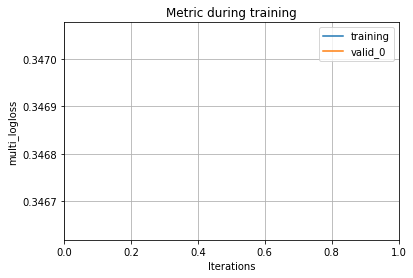

Accuracy:  0.9046324655436447


Iteration:  1
num_class:  3
num_tree_per_iteration:  1
max_feature_idx:  1
learning_rate:  0.1
num_leaves:  2
num_iterations:  2
max_bin:  2
Tree Size:  595


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.347012	valid_0's multi_logloss: 0.346684
[2]	training's multi_logloss: 0.340358	valid_0's multi_logloss: 0.340046


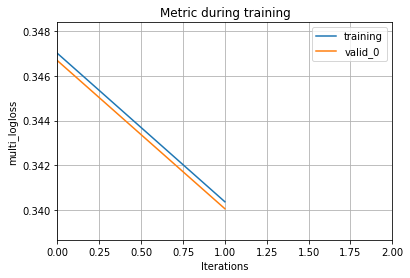

Accuracy:  0.9046324655436447


Iteration:  1
num_class:  3
num_tree_per_iteration:  1
max_feature_idx:  1
learning_rate:  0.1
num_leaves:  2
num_iterations:  3
max_bin:  2
Tree Size:  595


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.347012	valid_0's multi_logloss: 0.346684
[2]	training's multi_logloss: 0.340358	valid_0's multi_logloss: 0.340046
[3]	training's multi_logloss: 0.336445	valid_0's multi_logloss: 0.336142


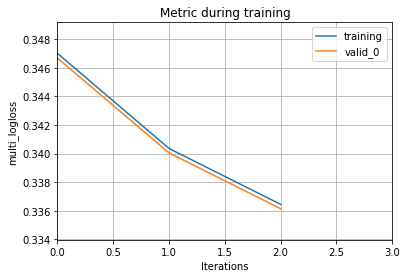

Accuracy:  0.9046324655436447


Iteration:  1
num_class:  3
num_tree_per_iteration:  1
max_feature_idx:  1
learning_rate:  0.1
num_leaves:  2
num_iterations:  4
max_bin:  2
Tree Size:  595


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.347012	valid_0's multi_logloss: 0.346684
[2]	training's multi_logloss: 0.340358	valid_0's multi_logloss: 0.340046
[3]	training's multi_logloss: 0.336445	valid_0's multi_logloss: 0.336142
[4]	training's multi_logloss: 0.333272	valid_0's multi_logloss: 0.332974


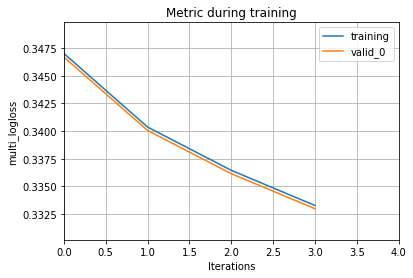

Accuracy:  0.9046324655436447


Iteration:  1
num_class:  3
num_tree_per_iteration:  1
max_feature_idx:  1
learning_rate:  0.1
num_leaves:  2
num_iterations:  5
max_bin:  2
Tree Size:  595


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.347012	valid_0's multi_logloss: 0.346684
[2]	training's multi_logloss: 0.340358	valid_0's multi_logloss: 0.340046
[3]	training's multi_logloss: 0.336445	valid_0's multi_logloss: 0.336142
[4]	training's multi_logloss: 0.333272	valid_0's multi_logloss: 0.332974
[5]	training's multi_logloss: 0.330888	valid_0's multi_logloss: 0.330598


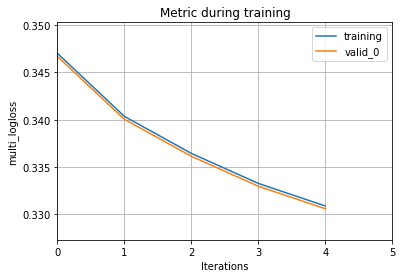

Accuracy:  0.9046324655436447


Iteration:  1
num_class:  3
num_tree_per_iteration:  1
max_feature_idx:  1
learning_rate:  0.1
num_leaves:  2
num_iterations:  6
max_bin:  2
Tree Size:  595


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.347012	valid_0's multi_logloss: 0.346684
[2]	training's multi_logloss: 0.340358	valid_0's multi_logloss: 0.340046
[3]	training's multi_logloss: 0.336445	valid_0's multi_logloss: 0.336142
[4]	training's multi_logloss: 0.333272	valid_0's multi_logloss: 0.332974
[5]	training's multi_logloss: 0.330888	valid_0's multi_logloss: 0.330598
[6]	training's multi_logloss: 0.32886	valid_0's multi_logloss: 0.328576


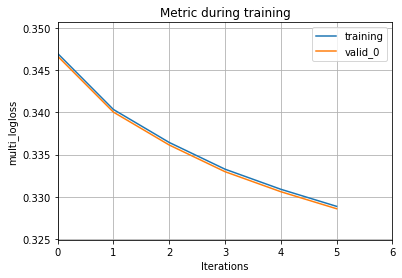

Accuracy:  0.9046324655436447


Iteration:  1
num_class:  3
num_tree_per_iteration:  1
max_feature_idx:  1
learning_rate:  0.1
num_leaves:  2
num_iterations:  7
max_bin:  2
Tree Size:  595


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.347012	valid_0's multi_logloss: 0.346684
[2]	training's multi_logloss: 0.340358	valid_0's multi_logloss: 0.340046
[3]	training's multi_logloss: 0.336445	valid_0's multi_logloss: 0.336142
[4]	training's multi_logloss: 0.333272	valid_0's multi_logloss: 0.332974
[5]	training's multi_logloss: 0.330888	valid_0's multi_logloss: 0.330598
[6]	training's multi_logloss: 0.32886	valid_0's multi_logloss: 0.328576
[7]	training's multi_logloss: 0.327104	valid_0's multi_logloss: 0.326798


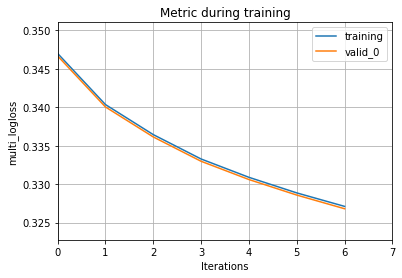

Accuracy:  0.9046324655436447


Iteration:  1
num_class:  3
num_tree_per_iteration:  1
max_feature_idx:  1
learning_rate:  0.1
num_leaves:  2
num_iterations:  8
max_bin:  2
Tree Size:  595


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.347012	valid_0's multi_logloss: 0.346684
[2]	training's multi_logloss: 0.340358	valid_0's multi_logloss: 0.340046
[3]	training's multi_logloss: 0.336445	valid_0's multi_logloss: 0.336142
[4]	training's multi_logloss: 0.333272	valid_0's multi_logloss: 0.332974
[5]	training's multi_logloss: 0.330888	valid_0's multi_logloss: 0.330598
[6]	training's multi_logloss: 0.32886	valid_0's multi_logloss: 0.328576
[7]	training's multi_logloss: 0.327104	valid_0's multi_logloss: 0.326798
[8]	training's multi_logloss: 0.325626	valid_0's multi_logloss: 0.325327


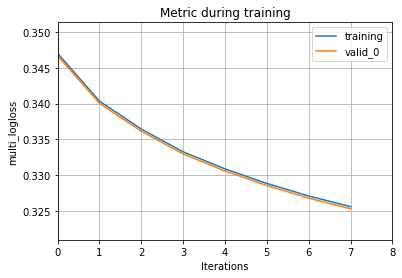

Accuracy:  0.9054747320061256


Iteration:  1
num_class:  3
num_tree_per_iteration:  1
max_feature_idx:  1
learning_rate:  0.1
num_leaves:  2
num_iterations:  9
max_bin:  2
Tree Size:  595


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.347012	valid_0's multi_logloss: 0.346684
[2]	training's multi_logloss: 0.340358	valid_0's multi_logloss: 0.340046
[3]	training's multi_logloss: 0.336445	valid_0's multi_logloss: 0.336142
[4]	training's multi_logloss: 0.333272	valid_0's multi_logloss: 0.332974
[5]	training's multi_logloss: 0.330888	valid_0's multi_logloss: 0.330598
[6]	training's multi_logloss: 0.32886	valid_0's multi_logloss: 0.328576
[7]	training's multi_logloss: 0.327104	valid_0's multi_logloss: 0.326798
[8]	training's multi_logloss: 0.325626	valid_0's multi_logloss: 0.325327
[9]	training's multi_logloss: 0.324265	valid_0's multi_logloss: 0.323973


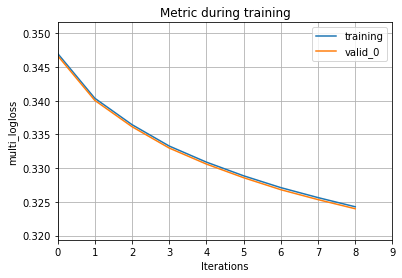

Accuracy:  0.906595930868519


Iteration:  2
num_class:  3
num_tree_per_iteration:  2
max_feature_idx:  2
learning_rate:  0.2
num_leaves:  3
num_iterations:  1
max_bin:  3
Tree Size:  600


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.329363	valid_0's multi_logloss: 0.329249


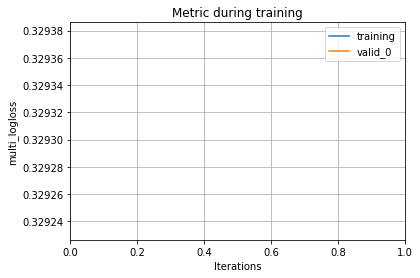

Accuracy:  0.9046324655436447


Iteration:  2
num_class:  3
num_tree_per_iteration:  2
max_feature_idx:  2
learning_rate:  0.2
num_leaves:  3
num_iterations:  2
max_bin:  3
Tree Size:  600


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.329363	valid_0's multi_logloss: 0.329249
[2]	training's multi_logloss: 0.322524	valid_0's multi_logloss: 0.322372


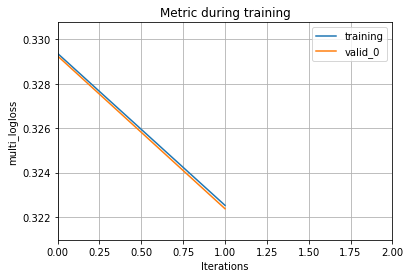

Accuracy:  0.9046324655436447


Iteration:  2
num_class:  3
num_tree_per_iteration:  2
max_feature_idx:  2
learning_rate:  0.2
num_leaves:  3
num_iterations:  3
max_bin:  3
Tree Size:  600


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.329363	valid_0's multi_logloss: 0.329249
[2]	training's multi_logloss: 0.322524	valid_0's multi_logloss: 0.322372
[3]	training's multi_logloss: 0.317326	valid_0's multi_logloss: 0.317158


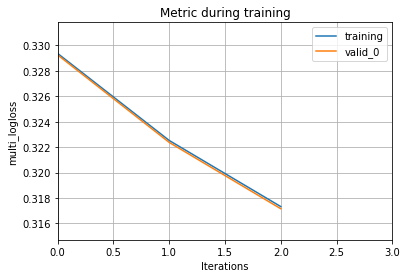

Accuracy:  0.9046324655436447


Iteration:  2
num_class:  3
num_tree_per_iteration:  2
max_feature_idx:  2
learning_rate:  0.2
num_leaves:  3
num_iterations:  4
max_bin:  3
Tree Size:  600


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.329363	valid_0's multi_logloss: 0.329249
[2]	training's multi_logloss: 0.322524	valid_0's multi_logloss: 0.322372
[3]	training's multi_logloss: 0.317326	valid_0's multi_logloss: 0.317158
[4]	training's multi_logloss: 0.314337	valid_0's multi_logloss: 0.314228


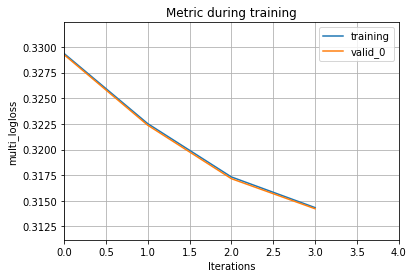

Accuracy:  0.9099923430321593


Iteration:  2
num_class:  3
num_tree_per_iteration:  2
max_feature_idx:  2
learning_rate:  0.2
num_leaves:  3
num_iterations:  5
max_bin:  3
Tree Size:  600


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.329363	valid_0's multi_logloss: 0.329249
[2]	training's multi_logloss: 0.322524	valid_0's multi_logloss: 0.322372
[3]	training's multi_logloss: 0.317326	valid_0's multi_logloss: 0.317158
[4]	training's multi_logloss: 0.314337	valid_0's multi_logloss: 0.314228
[5]	training's multi_logloss: 0.312178	valid_0's multi_logloss: 0.312063


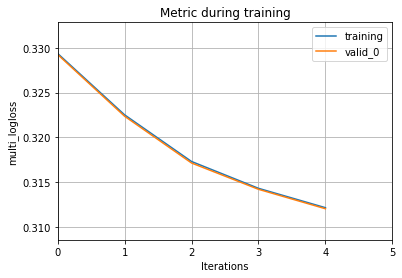

Accuracy:  0.9108674250711004


Iteration:  2
num_class:  3
num_tree_per_iteration:  2
max_feature_idx:  2
learning_rate:  0.2
num_leaves:  3
num_iterations:  6
max_bin:  3
Tree Size:  600


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.329363	valid_0's multi_logloss: 0.329249
[2]	training's multi_logloss: 0.322524	valid_0's multi_logloss: 0.322372
[3]	training's multi_logloss: 0.317326	valid_0's multi_logloss: 0.317158
[4]	training's multi_logloss: 0.314337	valid_0's multi_logloss: 0.314228
[5]	training's multi_logloss: 0.312178	valid_0's multi_logloss: 0.312063
[6]	training's multi_logloss: 0.310626	valid_0's multi_logloss: 0.310513


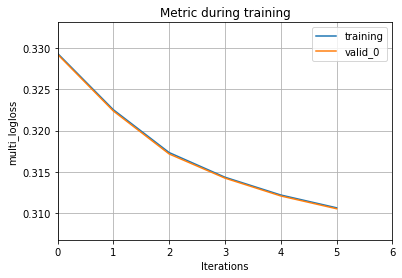

Accuracy:  0.9108674250711004


Iteration:  2
num_class:  3
num_tree_per_iteration:  2
max_feature_idx:  2
learning_rate:  0.2
num_leaves:  3
num_iterations:  7
max_bin:  3
Tree Size:  600


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.329363	valid_0's multi_logloss: 0.329249
[2]	training's multi_logloss: 0.322524	valid_0's multi_logloss: 0.322372
[3]	training's multi_logloss: 0.317326	valid_0's multi_logloss: 0.317158
[4]	training's multi_logloss: 0.314337	valid_0's multi_logloss: 0.314228
[5]	training's multi_logloss: 0.312178	valid_0's multi_logloss: 0.312063
[6]	training's multi_logloss: 0.310626	valid_0's multi_logloss: 0.310513
[7]	training's multi_logloss: 0.309367	valid_0's multi_logloss: 0.309241


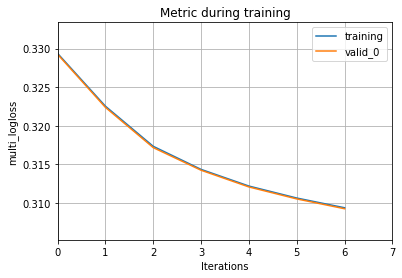

Accuracy:  0.9108674250711004


Iteration:  2
num_class:  3
num_tree_per_iteration:  2
max_feature_idx:  2
learning_rate:  0.2
num_leaves:  3
num_iterations:  8
max_bin:  3
Tree Size:  600


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.329363	valid_0's multi_logloss: 0.329249
[2]	training's multi_logloss: 0.322524	valid_0's multi_logloss: 0.322372
[3]	training's multi_logloss: 0.317326	valid_0's multi_logloss: 0.317158
[4]	training's multi_logloss: 0.314337	valid_0's multi_logloss: 0.314228
[5]	training's multi_logloss: 0.312178	valid_0's multi_logloss: 0.312063
[6]	training's multi_logloss: 0.310626	valid_0's multi_logloss: 0.310513
[7]	training's multi_logloss: 0.309367	valid_0's multi_logloss: 0.309241
[8]	training's multi_logloss: 0.308395	valid_0's multi_logloss: 0.30827


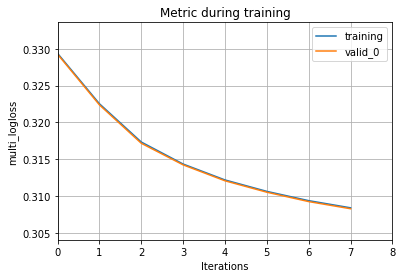

Accuracy:  0.9115164442499818


Iteration:  2
num_class:  3
num_tree_per_iteration:  2
max_feature_idx:  2
learning_rate:  0.2
num_leaves:  3
num_iterations:  9
max_bin:  3
Tree Size:  600


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.329363	valid_0's multi_logloss: 0.329249
[2]	training's multi_logloss: 0.322524	valid_0's multi_logloss: 0.322372
[3]	training's multi_logloss: 0.317326	valid_0's multi_logloss: 0.317158
[4]	training's multi_logloss: 0.314337	valid_0's multi_logloss: 0.314228
[5]	training's multi_logloss: 0.312178	valid_0's multi_logloss: 0.312063
[6]	training's multi_logloss: 0.310626	valid_0's multi_logloss: 0.310513
[7]	training's multi_logloss: 0.309367	valid_0's multi_logloss: 0.309241
[8]	training's multi_logloss: 0.308395	valid_0's multi_logloss: 0.30827
[9]	training's multi_logloss: 0.307667	valid_0's multi_logloss: 0.307549


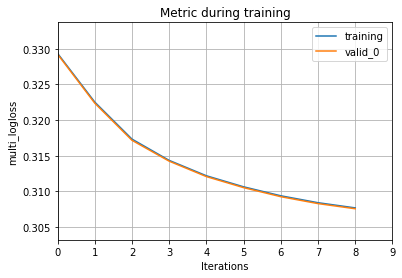

Accuracy:  0.9115164442499818


Iteration:  3
num_class:  3
num_tree_per_iteration:  3
max_feature_idx:  3
learning_rate:  0.3
num_leaves:  4
num_iterations:  1
max_bin:  4
Tree Size:  605


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316349	valid_0's multi_logloss: 0.316293


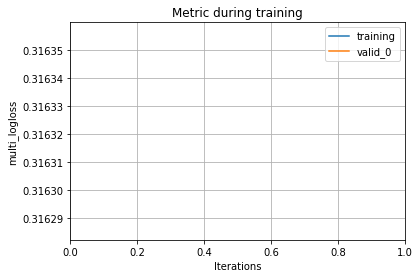

Accuracy:  0.9046324655436447


Iteration:  3
num_class:  3
num_tree_per_iteration:  3
max_feature_idx:  3
learning_rate:  0.3
num_leaves:  4
num_iterations:  2
max_bin:  4
Tree Size:  605


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316349	valid_0's multi_logloss: 0.316293
[2]	training's multi_logloss: 0.310742	valid_0's multi_logloss: 0.310727


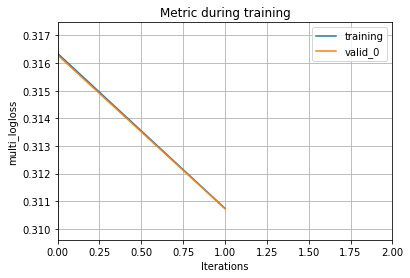

Accuracy:  0.913780719025742


Iteration:  3
num_class:  3
num_tree_per_iteration:  3
max_feature_idx:  3
learning_rate:  0.3
num_leaves:  4
num_iterations:  3
max_bin:  4
Tree Size:  605


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316349	valid_0's multi_logloss: 0.316293
[2]	training's multi_logloss: 0.310742	valid_0's multi_logloss: 0.310727
[3]	training's multi_logloss: 0.307988	valid_0's multi_logloss: 0.307976


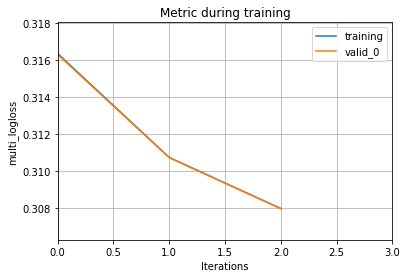

Accuracy:  0.9138171807773645


Iteration:  3
num_class:  3
num_tree_per_iteration:  3
max_feature_idx:  3
learning_rate:  0.3
num_leaves:  4
num_iterations:  4
max_bin:  4
Tree Size:  605


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316349	valid_0's multi_logloss: 0.316293
[2]	training's multi_logloss: 0.310742	valid_0's multi_logloss: 0.310727
[3]	training's multi_logloss: 0.307988	valid_0's multi_logloss: 0.307976
[4]	training's multi_logloss: 0.306511	valid_0's multi_logloss: 0.306524


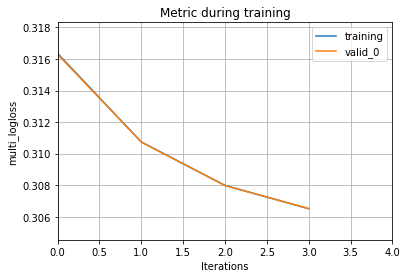

Accuracy:  0.9138171807773645


Iteration:  3
num_class:  3
num_tree_per_iteration:  3
max_feature_idx:  3
learning_rate:  0.3
num_leaves:  4
num_iterations:  5
max_bin:  4
Tree Size:  605


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316349	valid_0's multi_logloss: 0.316293
[2]	training's multi_logloss: 0.310742	valid_0's multi_logloss: 0.310727
[3]	training's multi_logloss: 0.307988	valid_0's multi_logloss: 0.307976
[4]	training's multi_logloss: 0.306511	valid_0's multi_logloss: 0.306524
[5]	training's multi_logloss: 0.305541	valid_0's multi_logloss: 0.305557


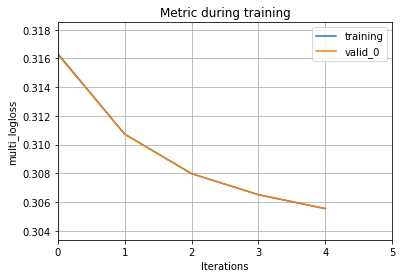

Accuracy:  0.9142018522569825


Iteration:  3
num_class:  3
num_tree_per_iteration:  3
max_feature_idx:  3
learning_rate:  0.3
num_leaves:  4
num_iterations:  6
max_bin:  4
Tree Size:  605


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316349	valid_0's multi_logloss: 0.316293
[2]	training's multi_logloss: 0.310742	valid_0's multi_logloss: 0.310727
[3]	training's multi_logloss: 0.307988	valid_0's multi_logloss: 0.307976
[4]	training's multi_logloss: 0.306511	valid_0's multi_logloss: 0.306524
[5]	training's multi_logloss: 0.305541	valid_0's multi_logloss: 0.305557
[6]	training's multi_logloss: 0.304855	valid_0's multi_logloss: 0.30486


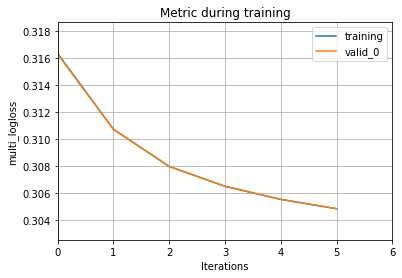

Accuracy:  0.9146448625391964


Iteration:  3
num_class:  3
num_tree_per_iteration:  3
max_feature_idx:  3
learning_rate:  0.3
num_leaves:  4
num_iterations:  7
max_bin:  4
Tree Size:  605


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316349	valid_0's multi_logloss: 0.316293
[2]	training's multi_logloss: 0.310742	valid_0's multi_logloss: 0.310727
[3]	training's multi_logloss: 0.307988	valid_0's multi_logloss: 0.307976
[4]	training's multi_logloss: 0.306511	valid_0's multi_logloss: 0.306524
[5]	training's multi_logloss: 0.305541	valid_0's multi_logloss: 0.305557
[6]	training's multi_logloss: 0.304855	valid_0's multi_logloss: 0.30486
[7]	training's multi_logloss: 0.304402	valid_0's multi_logloss: 0.304398


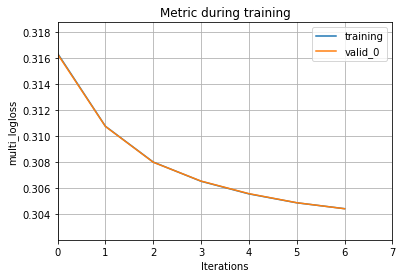

Accuracy:  0.9146448625391964


Iteration:  3
num_class:  3
num_tree_per_iteration:  3
max_feature_idx:  3
learning_rate:  0.3
num_leaves:  4
num_iterations:  8
max_bin:  4
Tree Size:  605


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316349	valid_0's multi_logloss: 0.316293
[2]	training's multi_logloss: 0.310742	valid_0's multi_logloss: 0.310727
[3]	training's multi_logloss: 0.307988	valid_0's multi_logloss: 0.307976
[4]	training's multi_logloss: 0.306511	valid_0's multi_logloss: 0.306524
[5]	training's multi_logloss: 0.305541	valid_0's multi_logloss: 0.305557
[6]	training's multi_logloss: 0.304855	valid_0's multi_logloss: 0.30486
[7]	training's multi_logloss: 0.304402	valid_0's multi_logloss: 0.304398
[8]	training's multi_logloss: 0.304096	valid_0's multi_logloss: 0.304084


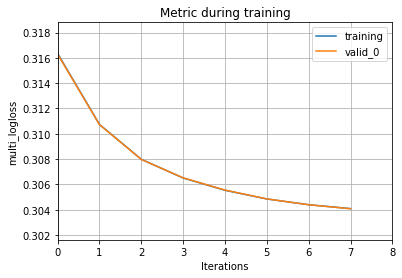

Accuracy:  0.9146448625391964


Iteration:  3
num_class:  3
num_tree_per_iteration:  3
max_feature_idx:  3
learning_rate:  0.3
num_leaves:  4
num_iterations:  9
max_bin:  4
Tree Size:  605


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316349	valid_0's multi_logloss: 0.316293
[2]	training's multi_logloss: 0.310742	valid_0's multi_logloss: 0.310727
[3]	training's multi_logloss: 0.307988	valid_0's multi_logloss: 0.307976
[4]	training's multi_logloss: 0.306511	valid_0's multi_logloss: 0.306524
[5]	training's multi_logloss: 0.305541	valid_0's multi_logloss: 0.305557
[6]	training's multi_logloss: 0.304855	valid_0's multi_logloss: 0.30486
[7]	training's multi_logloss: 0.304402	valid_0's multi_logloss: 0.304398
[8]	training's multi_logloss: 0.304096	valid_0's multi_logloss: 0.304084
[9]	training's multi_logloss: 0.303791	valid_0's multi_logloss: 0.303775


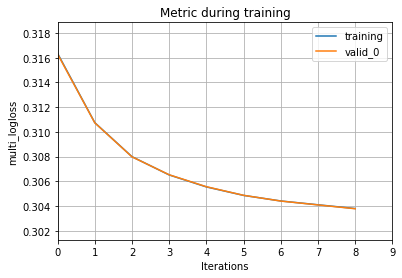

Accuracy:  0.9150058338802596


Iteration:  4
num_class:  3
num_tree_per_iteration:  4
max_feature_idx:  4
learning_rate:  0.4
num_leaves:  5
num_iterations:  1
max_bin:  5
Tree Size:  610


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.30843	valid_0's multi_logloss: 0.308481


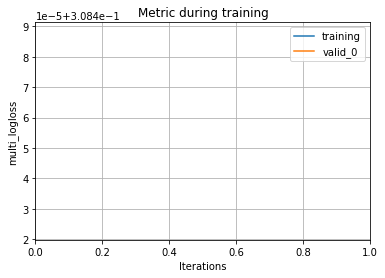

Accuracy:  0.9147050244293736


Iteration:  4
num_class:  3
num_tree_per_iteration:  4
max_feature_idx:  4
learning_rate:  0.4
num_leaves:  5
num_iterations:  2
max_bin:  5
Tree Size:  610


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.30843	valid_0's multi_logloss: 0.308481
[2]	training's multi_logloss: 0.305486	valid_0's multi_logloss: 0.305454


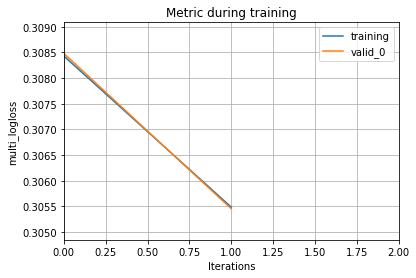

Accuracy:  0.9147050244293736


Iteration:  4
num_class:  3
num_tree_per_iteration:  4
max_feature_idx:  4
learning_rate:  0.4
num_leaves:  5
num_iterations:  3
max_bin:  5
Tree Size:  610


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.30843	valid_0's multi_logloss: 0.308481
[2]	training's multi_logloss: 0.305486	valid_0's multi_logloss: 0.305454
[3]	training's multi_logloss: 0.304231	valid_0's multi_logloss: 0.304211


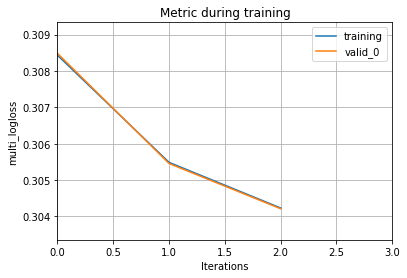

Accuracy:  0.9147050244293736


Iteration:  4
num_class:  3
num_tree_per_iteration:  4
max_feature_idx:  4
learning_rate:  0.4
num_leaves:  5
num_iterations:  4
max_bin:  5
Tree Size:  610


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.30843	valid_0's multi_logloss: 0.308481
[2]	training's multi_logloss: 0.305486	valid_0's multi_logloss: 0.305454
[3]	training's multi_logloss: 0.304231	valid_0's multi_logloss: 0.304211
[4]	training's multi_logloss: 0.303566	valid_0's multi_logloss: 0.303527


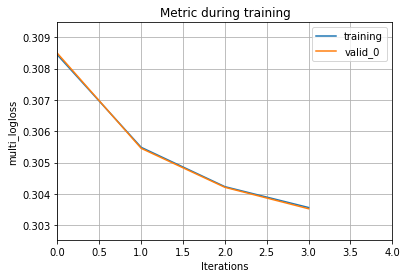

Accuracy:  0.9150896959089915


Iteration:  4
num_class:  3
num_tree_per_iteration:  4
max_feature_idx:  4
learning_rate:  0.4
num_leaves:  5
num_iterations:  5
max_bin:  5
Tree Size:  610


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.30843	valid_0's multi_logloss: 0.308481
[2]	training's multi_logloss: 0.305486	valid_0's multi_logloss: 0.305454
[3]	training's multi_logloss: 0.304231	valid_0's multi_logloss: 0.304211
[4]	training's multi_logloss: 0.303566	valid_0's multi_logloss: 0.303527
[5]	training's multi_logloss: 0.303177	valid_0's multi_logloss: 0.303139


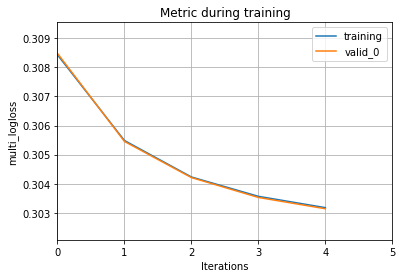

Accuracy:  0.9155327061912054


Iteration:  4
num_class:  3
num_tree_per_iteration:  4
max_feature_idx:  4
learning_rate:  0.4
num_leaves:  5
num_iterations:  6
max_bin:  5
Tree Size:  610


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.30843	valid_0's multi_logloss: 0.308481
[2]	training's multi_logloss: 0.305486	valid_0's multi_logloss: 0.305454
[3]	training's multi_logloss: 0.304231	valid_0's multi_logloss: 0.304211
[4]	training's multi_logloss: 0.303566	valid_0's multi_logloss: 0.303527
[5]	training's multi_logloss: 0.303177	valid_0's multi_logloss: 0.303139
[6]	training's multi_logloss: 0.302953	valid_0's multi_logloss: 0.302909


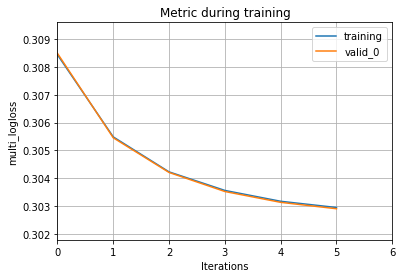

Accuracy:  0.9160285860132721


Iteration:  4
num_class:  3
num_tree_per_iteration:  4
max_feature_idx:  4
learning_rate:  0.4
num_leaves:  5
num_iterations:  7
max_bin:  5
Tree Size:  610


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.30843	valid_0's multi_logloss: 0.308481
[2]	training's multi_logloss: 0.305486	valid_0's multi_logloss: 0.305454
[3]	training's multi_logloss: 0.304231	valid_0's multi_logloss: 0.304211
[4]	training's multi_logloss: 0.303566	valid_0's multi_logloss: 0.303527
[5]	training's multi_logloss: 0.303177	valid_0's multi_logloss: 0.303139
[6]	training's multi_logloss: 0.302953	valid_0's multi_logloss: 0.302909
[7]	training's multi_logloss: 0.302804	valid_0's multi_logloss: 0.302759


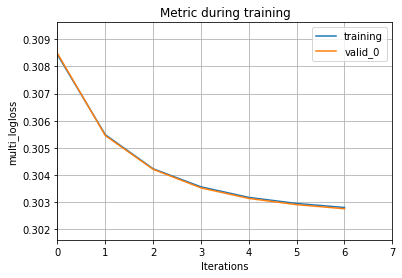

Accuracy:  0.9160285860132721


Iteration:  4
num_class:  3
num_tree_per_iteration:  4
max_feature_idx:  4
learning_rate:  0.4
num_leaves:  5
num_iterations:  8
max_bin:  5
Tree Size:  610


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.30843	valid_0's multi_logloss: 0.308481
[2]	training's multi_logloss: 0.305486	valid_0's multi_logloss: 0.305454
[3]	training's multi_logloss: 0.304231	valid_0's multi_logloss: 0.304211
[4]	training's multi_logloss: 0.303566	valid_0's multi_logloss: 0.303527
[5]	training's multi_logloss: 0.303177	valid_0's multi_logloss: 0.303139
[6]	training's multi_logloss: 0.302953	valid_0's multi_logloss: 0.302909
[7]	training's multi_logloss: 0.302804	valid_0's multi_logloss: 0.302759
[8]	training's multi_logloss: 0.302684	valid_0's multi_logloss: 0.302642


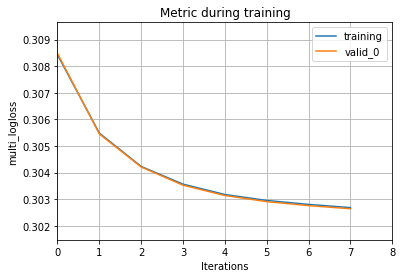

Accuracy:  0.9162965798876979


Iteration:  4
num_class:  3
num_tree_per_iteration:  4
max_feature_idx:  4
learning_rate:  0.4
num_leaves:  5
num_iterations:  9
max_bin:  5
Tree Size:  610


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.30843	valid_0's multi_logloss: 0.308481
[2]	training's multi_logloss: 0.305486	valid_0's multi_logloss: 0.305454
[3]	training's multi_logloss: 0.304231	valid_0's multi_logloss: 0.304211
[4]	training's multi_logloss: 0.303566	valid_0's multi_logloss: 0.303527
[5]	training's multi_logloss: 0.303177	valid_0's multi_logloss: 0.303139
[6]	training's multi_logloss: 0.302953	valid_0's multi_logloss: 0.302909
[7]	training's multi_logloss: 0.302804	valid_0's multi_logloss: 0.302759
[8]	training's multi_logloss: 0.302684	valid_0's multi_logloss: 0.302642
[9]	training's multi_logloss: 0.302611	valid_0's multi_logloss: 0.302568


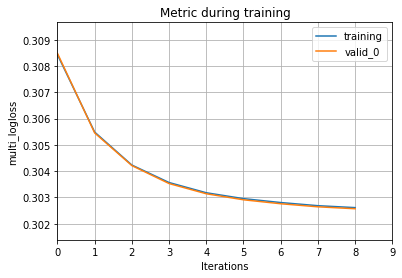

Accuracy:  0.9162965798876979


Iteration:  5
num_class:  3
num_tree_per_iteration:  5
max_feature_idx:  5
learning_rate:  0.5
num_leaves:  6
num_iterations:  1
max_bin:  6
Tree Size:  615


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.306835	valid_0's multi_logloss: 0.306955


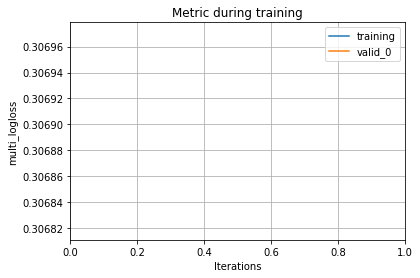

Accuracy:  0.9149730183037993


Iteration:  5
num_class:  3
num_tree_per_iteration:  5
max_feature_idx:  5
learning_rate:  0.5
num_leaves:  6
num_iterations:  2
max_bin:  6
Tree Size:  615


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.306835	valid_0's multi_logloss: 0.306955
[2]	training's multi_logloss: 0.304371	valid_0's multi_logloss: 0.304418


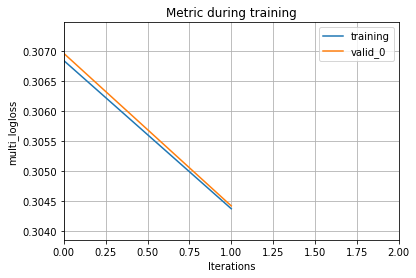

Accuracy:  0.9152610661416174


Iteration:  5
num_class:  3
num_tree_per_iteration:  5
max_feature_idx:  5
learning_rate:  0.5
num_leaves:  6
num_iterations:  3
max_bin:  6
Tree Size:  615


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.306835	valid_0's multi_logloss: 0.306955
[2]	training's multi_logloss: 0.304371	valid_0's multi_logloss: 0.304418
[3]	training's multi_logloss: 0.303188	valid_0's multi_logloss: 0.303176


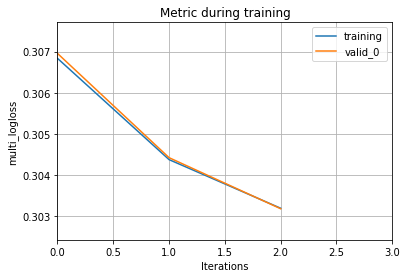

Accuracy:  0.9161835484576679


Iteration:  5
num_class:  3
num_tree_per_iteration:  5
max_feature_idx:  5
learning_rate:  0.5
num_leaves:  6
num_iterations:  4
max_bin:  6
Tree Size:  615


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.306835	valid_0's multi_logloss: 0.306955
[2]	training's multi_logloss: 0.304371	valid_0's multi_logloss: 0.304418
[3]	training's multi_logloss: 0.303188	valid_0's multi_logloss: 0.303176
[4]	training's multi_logloss: 0.302809	valid_0's multi_logloss: 0.302772


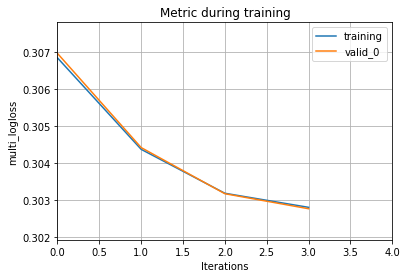

Accuracy:  0.9166794282797346


Iteration:  5
num_class:  3
num_tree_per_iteration:  5
max_feature_idx:  5
learning_rate:  0.5
num_leaves:  6
num_iterations:  5
max_bin:  6
Tree Size:  615


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.306835	valid_0's multi_logloss: 0.306955
[2]	training's multi_logloss: 0.304371	valid_0's multi_logloss: 0.304418
[3]	training's multi_logloss: 0.303188	valid_0's multi_logloss: 0.303176
[4]	training's multi_logloss: 0.302809	valid_0's multi_logloss: 0.302772
[5]	training's multi_logloss: 0.30254	valid_0's multi_logloss: 0.302497


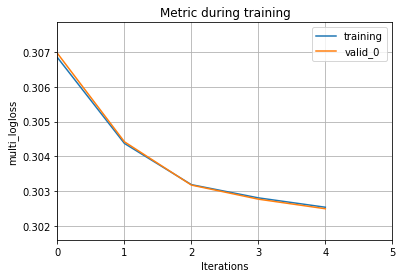

Accuracy:  0.9166794282797346


Iteration:  5
num_class:  3
num_tree_per_iteration:  5
max_feature_idx:  5
learning_rate:  0.5
num_leaves:  6
num_iterations:  6
max_bin:  6
Tree Size:  615


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.306835	valid_0's multi_logloss: 0.306955
[2]	training's multi_logloss: 0.304371	valid_0's multi_logloss: 0.304418
[3]	training's multi_logloss: 0.303188	valid_0's multi_logloss: 0.303176
[4]	training's multi_logloss: 0.302809	valid_0's multi_logloss: 0.302772
[5]	training's multi_logloss: 0.30254	valid_0's multi_logloss: 0.302497
[6]	training's multi_logloss: 0.302418	valid_0's multi_logloss: 0.302365


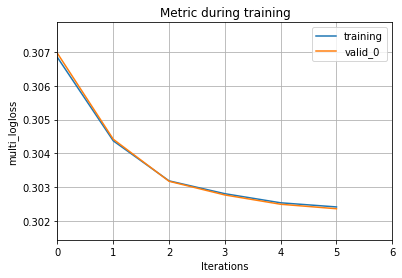

Accuracy:  0.9166794282797346


Iteration:  5
num_class:  3
num_tree_per_iteration:  5
max_feature_idx:  5
learning_rate:  0.5
num_leaves:  6
num_iterations:  7
max_bin:  6
Tree Size:  615


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.306835	valid_0's multi_logloss: 0.306955
[2]	training's multi_logloss: 0.304371	valid_0's multi_logloss: 0.304418
[3]	training's multi_logloss: 0.303188	valid_0's multi_logloss: 0.303176
[4]	training's multi_logloss: 0.302809	valid_0's multi_logloss: 0.302772
[5]	training's multi_logloss: 0.30254	valid_0's multi_logloss: 0.302497
[6]	training's multi_logloss: 0.302418	valid_0's multi_logloss: 0.302365
[7]	training's multi_logloss: 0.302379	valid_0's multi_logloss: 0.302326


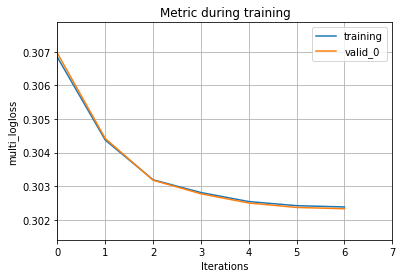

Accuracy:  0.9166794282797346


Iteration:  5
num_class:  3
num_tree_per_iteration:  5
max_feature_idx:  5
learning_rate:  0.5
num_leaves:  6
num_iterations:  8
max_bin:  6
Tree Size:  615


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.306835	valid_0's multi_logloss: 0.306955
[2]	training's multi_logloss: 0.304371	valid_0's multi_logloss: 0.304418
[3]	training's multi_logloss: 0.303188	valid_0's multi_logloss: 0.303176
[4]	training's multi_logloss: 0.302809	valid_0's multi_logloss: 0.302772
[5]	training's multi_logloss: 0.30254	valid_0's multi_logloss: 0.302497
[6]	training's multi_logloss: 0.302418	valid_0's multi_logloss: 0.302365
[7]	training's multi_logloss: 0.302379	valid_0's multi_logloss: 0.302326
[8]	training's multi_logloss: 0.302321	valid_0's multi_logloss: 0.302273


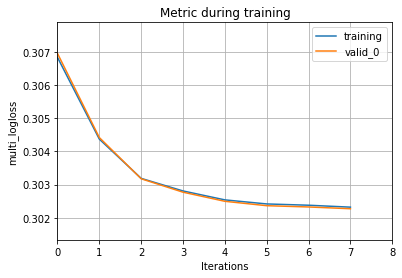

Accuracy:  0.9166794282797346


Iteration:  5
num_class:  3
num_tree_per_iteration:  5
max_feature_idx:  5
learning_rate:  0.5
num_leaves:  6
num_iterations:  9
max_bin:  6
Tree Size:  615


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.306835	valid_0's multi_logloss: 0.306955
[2]	training's multi_logloss: 0.304371	valid_0's multi_logloss: 0.304418
[3]	training's multi_logloss: 0.303188	valid_0's multi_logloss: 0.303176
[4]	training's multi_logloss: 0.302809	valid_0's multi_logloss: 0.302772
[5]	training's multi_logloss: 0.30254	valid_0's multi_logloss: 0.302497
[6]	training's multi_logloss: 0.302418	valid_0's multi_logloss: 0.302365
[7]	training's multi_logloss: 0.302379	valid_0's multi_logloss: 0.302326
[8]	training's multi_logloss: 0.302321	valid_0's multi_logloss: 0.302273
[9]	training's multi_logloss: 0.302289	valid_0's multi_logloss: 0.302239


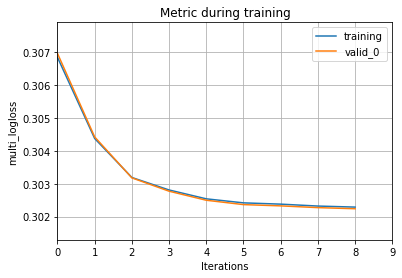

Accuracy:  0.9166794282797346


Iteration:  6
num_class:  3
num_tree_per_iteration:  6
max_feature_idx:  6
learning_rate:  0.6
num_leaves:  7
num_iterations:  1
max_bin:  7
Tree Size:  620


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.309996	valid_0's multi_logloss: 0.310284


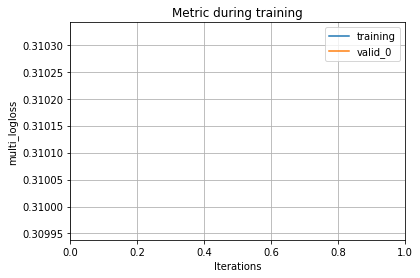

Accuracy:  0.9158955006198498


Iteration:  6
num_class:  3
num_tree_per_iteration:  6
max_feature_idx:  6
learning_rate:  0.6
num_leaves:  7
num_iterations:  2
max_bin:  7
Tree Size:  620


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.309996	valid_0's multi_logloss: 0.310284
[2]	training's multi_logloss: 0.303585	valid_0's multi_logloss: 0.303622


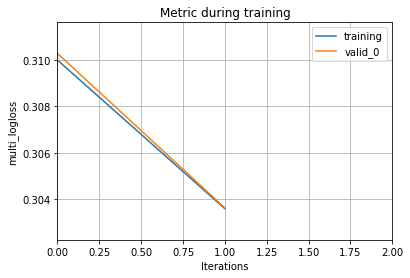

Accuracy:  0.9163111645883468


Iteration:  6
num_class:  3
num_tree_per_iteration:  6
max_feature_idx:  6
learning_rate:  0.6
num_leaves:  7
num_iterations:  3
max_bin:  7
Tree Size:  620


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.309996	valid_0's multi_logloss: 0.310284
[2]	training's multi_logloss: 0.303585	valid_0's multi_logloss: 0.303622
[3]	training's multi_logloss: 0.302703	valid_0's multi_logloss: 0.302718


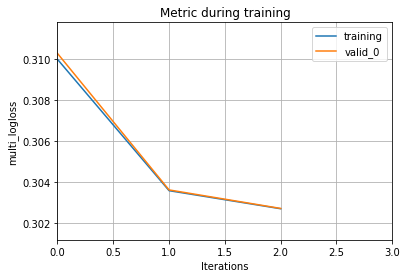

Accuracy:  0.9166794282797346


Iteration:  6
num_class:  3
num_tree_per_iteration:  6
max_feature_idx:  6
learning_rate:  0.6
num_leaves:  7
num_iterations:  4
max_bin:  7
Tree Size:  620


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.309996	valid_0's multi_logloss: 0.310284
[2]	training's multi_logloss: 0.303585	valid_0's multi_logloss: 0.303622
[3]	training's multi_logloss: 0.302703	valid_0's multi_logloss: 0.302718
[4]	training's multi_logloss: 0.30245	valid_0's multi_logloss: 0.302434


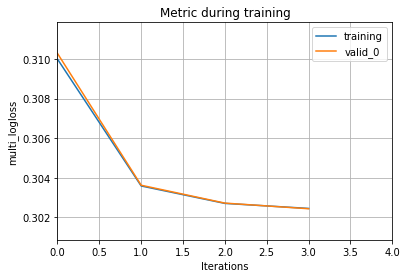

Accuracy:  0.9166794282797346


Iteration:  6
num_class:  3
num_tree_per_iteration:  6
max_feature_idx:  6
learning_rate:  0.6
num_leaves:  7
num_iterations:  5
max_bin:  7
Tree Size:  620


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.309996	valid_0's multi_logloss: 0.310284
[2]	training's multi_logloss: 0.303585	valid_0's multi_logloss: 0.303622
[3]	training's multi_logloss: 0.302703	valid_0's multi_logloss: 0.302718
[4]	training's multi_logloss: 0.30245	valid_0's multi_logloss: 0.302434
[5]	training's multi_logloss: 0.302341	valid_0's multi_logloss: 0.302318


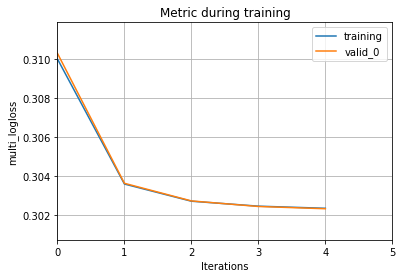

Accuracy:  0.9166794282797346


Iteration:  6
num_class:  3
num_tree_per_iteration:  6
max_feature_idx:  6
learning_rate:  0.6
num_leaves:  7
num_iterations:  6
max_bin:  7
Tree Size:  620


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.309996	valid_0's multi_logloss: 0.310284
[2]	training's multi_logloss: 0.303585	valid_0's multi_logloss: 0.303622
[3]	training's multi_logloss: 0.302703	valid_0's multi_logloss: 0.302718
[4]	training's multi_logloss: 0.30245	valid_0's multi_logloss: 0.302434
[5]	training's multi_logloss: 0.302341	valid_0's multi_logloss: 0.302318
[6]	training's multi_logloss: 0.302287	valid_0's multi_logloss: 0.302256


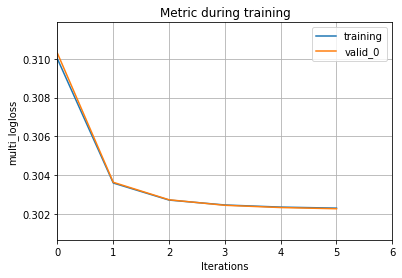

Accuracy:  0.9166794282797346


Iteration:  6
num_class:  3
num_tree_per_iteration:  6
max_feature_idx:  6
learning_rate:  0.6
num_leaves:  7
num_iterations:  7
max_bin:  7
Tree Size:  620


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.309996	valid_0's multi_logloss: 0.310284
[2]	training's multi_logloss: 0.303585	valid_0's multi_logloss: 0.303622
[3]	training's multi_logloss: 0.302703	valid_0's multi_logloss: 0.302718
[4]	training's multi_logloss: 0.30245	valid_0's multi_logloss: 0.302434
[5]	training's multi_logloss: 0.302341	valid_0's multi_logloss: 0.302318
[6]	training's multi_logloss: 0.302287	valid_0's multi_logloss: 0.302256
[7]	training's multi_logloss: 0.302259	valid_0's multi_logloss: 0.302221


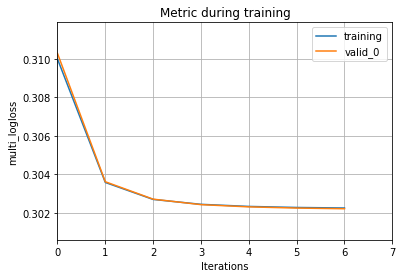

Accuracy:  0.9166794282797346


Iteration:  6
num_class:  3
num_tree_per_iteration:  6
max_feature_idx:  6
learning_rate:  0.6
num_leaves:  7
num_iterations:  8
max_bin:  7
Tree Size:  620


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.309996	valid_0's multi_logloss: 0.310284
[2]	training's multi_logloss: 0.303585	valid_0's multi_logloss: 0.303622
[3]	training's multi_logloss: 0.302703	valid_0's multi_logloss: 0.302718
[4]	training's multi_logloss: 0.30245	valid_0's multi_logloss: 0.302434
[5]	training's multi_logloss: 0.302341	valid_0's multi_logloss: 0.302318
[6]	training's multi_logloss: 0.302287	valid_0's multi_logloss: 0.302256
[7]	training's multi_logloss: 0.302259	valid_0's multi_logloss: 0.302221
[8]	training's multi_logloss: 0.302242	valid_0's multi_logloss: 0.302208


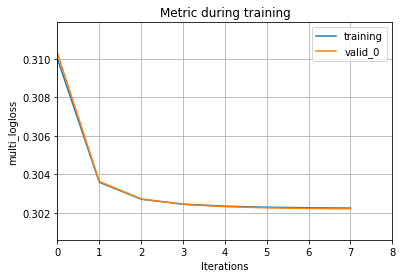

Accuracy:  0.9166794282797346


Iteration:  6
num_class:  3
num_tree_per_iteration:  6
max_feature_idx:  6
learning_rate:  0.6
num_leaves:  7
num_iterations:  9
max_bin:  7
Tree Size:  620


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.309996	valid_0's multi_logloss: 0.310284
[2]	training's multi_logloss: 0.303585	valid_0's multi_logloss: 0.303622
[3]	training's multi_logloss: 0.302703	valid_0's multi_logloss: 0.302718
[4]	training's multi_logloss: 0.30245	valid_0's multi_logloss: 0.302434
[5]	training's multi_logloss: 0.302341	valid_0's multi_logloss: 0.302318
[6]	training's multi_logloss: 0.302287	valid_0's multi_logloss: 0.302256
[7]	training's multi_logloss: 0.302259	valid_0's multi_logloss: 0.302221
[8]	training's multi_logloss: 0.302242	valid_0's multi_logloss: 0.302208
[9]	training's multi_logloss: 0.302232	valid_0's multi_logloss: 0.302194


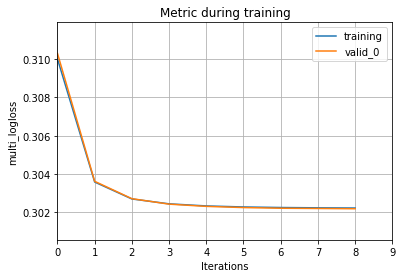

Accuracy:  0.9166794282797346


Iteration:  7
num_class:  3
num_tree_per_iteration:  7
max_feature_idx:  7
learning_rate:  0.7
num_leaves:  8
num_iterations:  1
max_bin:  8
Tree Size:  625


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316329	valid_0's multi_logloss: 0.316845


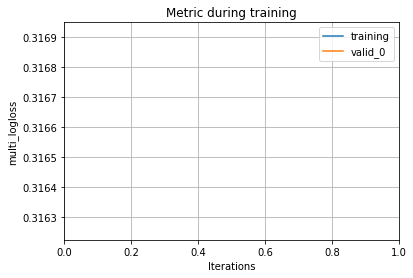

Accuracy:  0.9132119157004303


Iteration:  7
num_class:  3
num_tree_per_iteration:  7
max_feature_idx:  7
learning_rate:  0.7
num_leaves:  8
num_iterations:  2
max_bin:  8
Tree Size:  625


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316329	valid_0's multi_logloss: 0.316845
[2]	training's multi_logloss: 0.307674	valid_0's multi_logloss: 0.307624


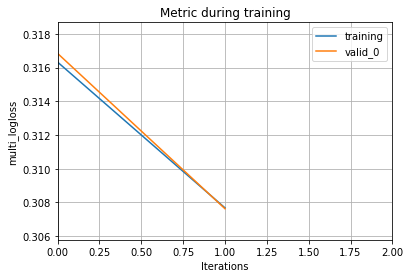

Accuracy:  0.9059706118281923


Iteration:  7
num_class:  3
num_tree_per_iteration:  7
max_feature_idx:  7
learning_rate:  0.7
num_leaves:  8
num_iterations:  3
max_bin:  8
Tree Size:  625


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316329	valid_0's multi_logloss: 0.316845
[2]	training's multi_logloss: 0.307674	valid_0's multi_logloss: 0.307624
[3]	training's multi_logloss: 0.302874	valid_0's multi_logloss: 0.30284


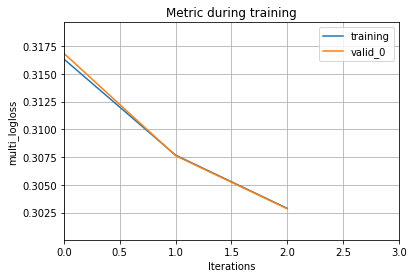

Accuracy:  0.9166794282797346


Iteration:  7
num_class:  3
num_tree_per_iteration:  7
max_feature_idx:  7
learning_rate:  0.7
num_leaves:  8
num_iterations:  4
max_bin:  8
Tree Size:  625


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316329	valid_0's multi_logloss: 0.316845
[2]	training's multi_logloss: 0.307674	valid_0's multi_logloss: 0.307624
[3]	training's multi_logloss: 0.302874	valid_0's multi_logloss: 0.30284
[4]	training's multi_logloss: 0.302352	valid_0's multi_logloss: 0.302322


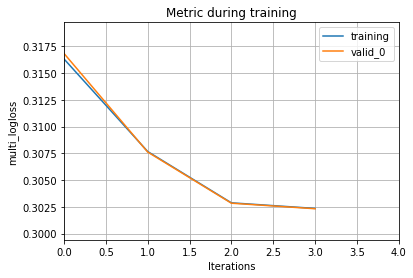

Accuracy:  0.9166794282797346


Iteration:  7
num_class:  3
num_tree_per_iteration:  7
max_feature_idx:  7
learning_rate:  0.7
num_leaves:  8
num_iterations:  5
max_bin:  8
Tree Size:  625


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316329	valid_0's multi_logloss: 0.316845
[2]	training's multi_logloss: 0.307674	valid_0's multi_logloss: 0.307624
[3]	training's multi_logloss: 0.302874	valid_0's multi_logloss: 0.30284
[4]	training's multi_logloss: 0.302352	valid_0's multi_logloss: 0.302322
[5]	training's multi_logloss: 0.302259	valid_0's multi_logloss: 0.302234


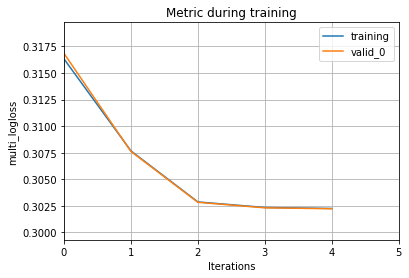

Accuracy:  0.9166794282797346


Iteration:  7
num_class:  3
num_tree_per_iteration:  7
max_feature_idx:  7
learning_rate:  0.7
num_leaves:  8
num_iterations:  6
max_bin:  8
Tree Size:  625


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316329	valid_0's multi_logloss: 0.316845
[2]	training's multi_logloss: 0.307674	valid_0's multi_logloss: 0.307624
[3]	training's multi_logloss: 0.302874	valid_0's multi_logloss: 0.30284
[4]	training's multi_logloss: 0.302352	valid_0's multi_logloss: 0.302322
[5]	training's multi_logloss: 0.302259	valid_0's multi_logloss: 0.302234
[6]	training's multi_logloss: 0.302235	valid_0's multi_logloss: 0.302208


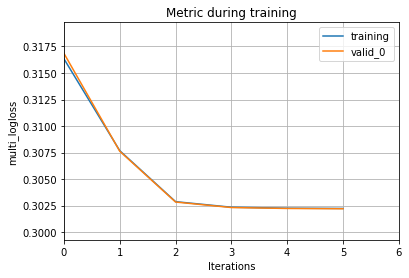

Accuracy:  0.9166794282797346


Iteration:  7
num_class:  3
num_tree_per_iteration:  7
max_feature_idx:  7
learning_rate:  0.7
num_leaves:  8
num_iterations:  7
max_bin:  8
Tree Size:  625


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316329	valid_0's multi_logloss: 0.316845
[2]	training's multi_logloss: 0.307674	valid_0's multi_logloss: 0.307624
[3]	training's multi_logloss: 0.302874	valid_0's multi_logloss: 0.30284
[4]	training's multi_logloss: 0.302352	valid_0's multi_logloss: 0.302322
[5]	training's multi_logloss: 0.302259	valid_0's multi_logloss: 0.302234
[6]	training's multi_logloss: 0.302235	valid_0's multi_logloss: 0.302208
[7]	training's multi_logloss: 0.302226	valid_0's multi_logloss: 0.3022


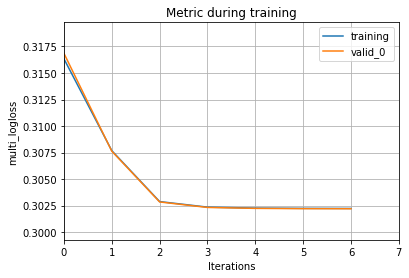

Accuracy:  0.9166794282797346


Iteration:  7
num_class:  3
num_tree_per_iteration:  7
max_feature_idx:  7
learning_rate:  0.7
num_leaves:  8
num_iterations:  8
max_bin:  8
Tree Size:  625


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316329	valid_0's multi_logloss: 0.316845
[2]	training's multi_logloss: 0.307674	valid_0's multi_logloss: 0.307624
[3]	training's multi_logloss: 0.302874	valid_0's multi_logloss: 0.30284
[4]	training's multi_logloss: 0.302352	valid_0's multi_logloss: 0.302322
[5]	training's multi_logloss: 0.302259	valid_0's multi_logloss: 0.302234
[6]	training's multi_logloss: 0.302235	valid_0's multi_logloss: 0.302208
[7]	training's multi_logloss: 0.302226	valid_0's multi_logloss: 0.3022
[8]	training's multi_logloss: 0.30222	valid_0's multi_logloss: 0.302189


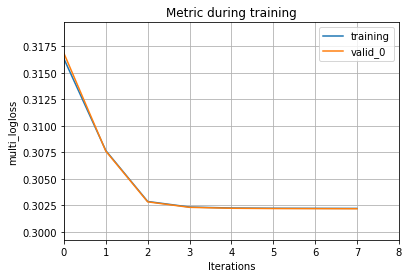

Accuracy:  0.9166794282797346


Iteration:  7
num_class:  3
num_tree_per_iteration:  7
max_feature_idx:  7
learning_rate:  0.7
num_leaves:  8
num_iterations:  9
max_bin:  8
Tree Size:  625


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316329	valid_0's multi_logloss: 0.316845
[2]	training's multi_logloss: 0.307674	valid_0's multi_logloss: 0.307624
[3]	training's multi_logloss: 0.302874	valid_0's multi_logloss: 0.30284
[4]	training's multi_logloss: 0.302352	valid_0's multi_logloss: 0.302322
[5]	training's multi_logloss: 0.302259	valid_0's multi_logloss: 0.302234
[6]	training's multi_logloss: 0.302235	valid_0's multi_logloss: 0.302208
[7]	training's multi_logloss: 0.302226	valid_0's multi_logloss: 0.3022
[8]	training's multi_logloss: 0.30222	valid_0's multi_logloss: 0.302189
[9]	training's multi_logloss: 0.302217	valid_0's multi_logloss: 0.302187


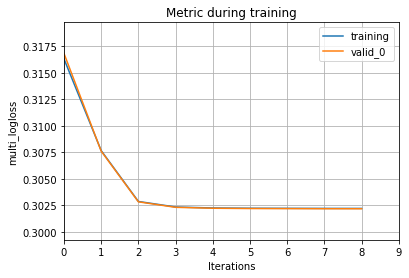

Accuracy:  0.9166794282797346


Iteration:  8
num_class:  3
num_tree_per_iteration:  8
max_feature_idx:  8
learning_rate:  0.8
num_leaves:  9
num_iterations:  1
max_bin:  9
Tree Size:  630


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.324673	valid_0's multi_logloss: 0.325265


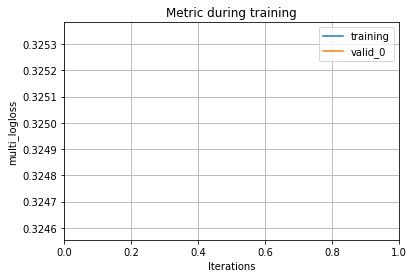

Accuracy:  0.9132119157004303


Iteration:  8
num_class:  3
num_tree_per_iteration:  8
max_feature_idx:  8
learning_rate:  0.8
num_leaves:  9
num_iterations:  2
max_bin:  9
Tree Size:  630


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.324673	valid_0's multi_logloss: 0.325265
[2]	training's multi_logloss: 0.37428	valid_0's multi_logloss: 0.374401


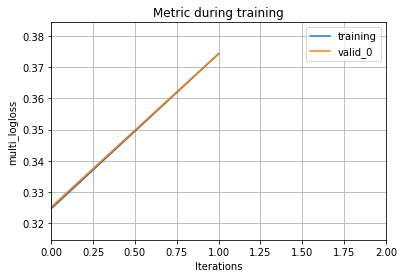

Accuracy:  0.9053252388244731


Iteration:  8
num_class:  3
num_tree_per_iteration:  8
max_feature_idx:  8
learning_rate:  0.8
num_leaves:  9
num_iterations:  3
max_bin:  9
Tree Size:  630


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.324673	valid_0's multi_logloss: 0.325265
[2]	training's multi_logloss: 0.37428	valid_0's multi_logloss: 0.374401
[3]	training's multi_logloss: 0.543796	valid_0's multi_logloss: 0.550007


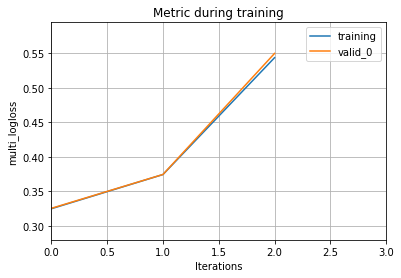

Accuracy:  0.9162163640341282


Iteration:  8
num_class:  3
num_tree_per_iteration:  8
max_feature_idx:  8
learning_rate:  0.8
num_leaves:  9
num_iterations:  4
max_bin:  9
Tree Size:  630


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.324673	valid_0's multi_logloss: 0.325265
[2]	training's multi_logloss: 0.37428	valid_0's multi_logloss: 0.374401
[3]	training's multi_logloss: 0.543796	valid_0's multi_logloss: 0.550007
[4]	training's multi_logloss: 0.715272	valid_0's multi_logloss: 0.71872


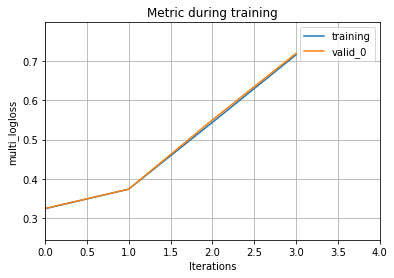

Accuracy:  0.9123878801137607


Iteration:  8
num_class:  3
num_tree_per_iteration:  8
max_feature_idx:  8
learning_rate:  0.8
num_leaves:  9
num_iterations:  5
max_bin:  9
Tree Size:  630


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.324673	valid_0's multi_logloss: 0.325265
[2]	training's multi_logloss: 0.37428	valid_0's multi_logloss: 0.374401
[3]	training's multi_logloss: 0.543796	valid_0's multi_logloss: 0.550007
[4]	training's multi_logloss: 0.715272	valid_0's multi_logloss: 0.71872
[5]	training's multi_logloss: 0.720666	valid_0's multi_logloss: 0.724857


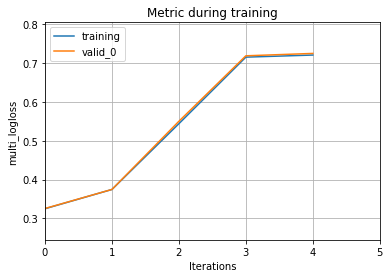

Accuracy:  0.9124680959673303


Iteration:  8
num_class:  3
num_tree_per_iteration:  8
max_feature_idx:  8
learning_rate:  0.8
num_leaves:  9
num_iterations:  6
max_bin:  9
Tree Size:  630


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.324673	valid_0's multi_logloss: 0.325265
[2]	training's multi_logloss: 0.37428	valid_0's multi_logloss: 0.374401
[3]	training's multi_logloss: 0.543796	valid_0's multi_logloss: 0.550007
[4]	training's multi_logloss: 0.715272	valid_0's multi_logloss: 0.71872
[5]	training's multi_logloss: 0.720666	valid_0's multi_logloss: 0.724857
[6]	training's multi_logloss: 0.630183	valid_0's multi_logloss: 0.63628


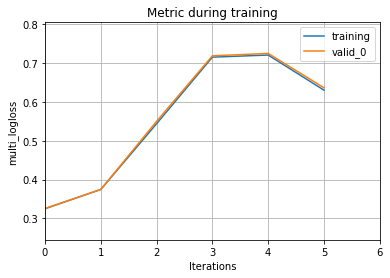

Accuracy:  0.9155071829650696


Iteration:  8
num_class:  3
num_tree_per_iteration:  8
max_feature_idx:  8
learning_rate:  0.8
num_leaves:  9
num_iterations:  7
max_bin:  9
Tree Size:  630


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.324673	valid_0's multi_logloss: 0.325265
[2]	training's multi_logloss: 0.37428	valid_0's multi_logloss: 0.374401
[3]	training's multi_logloss: 0.543796	valid_0's multi_logloss: 0.550007
[4]	training's multi_logloss: 0.715272	valid_0's multi_logloss: 0.71872
[5]	training's multi_logloss: 0.720666	valid_0's multi_logloss: 0.724857
[6]	training's multi_logloss: 0.630183	valid_0's multi_logloss: 0.63628
[7]	training's multi_logloss: 0.624882	valid_0's multi_logloss: 0.630287


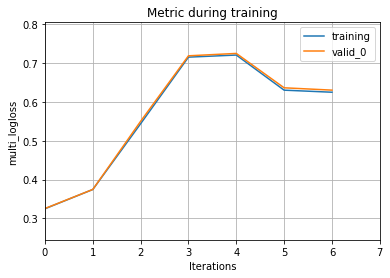

Accuracy:  0.9157077225989937


Iteration:  8
num_class:  3
num_tree_per_iteration:  8
max_feature_idx:  8
learning_rate:  0.8
num_leaves:  9
num_iterations:  8
max_bin:  9
Tree Size:  630


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.324673	valid_0's multi_logloss: 0.325265
[2]	training's multi_logloss: 0.37428	valid_0's multi_logloss: 0.374401
[3]	training's multi_logloss: 0.543796	valid_0's multi_logloss: 0.550007
[4]	training's multi_logloss: 0.715272	valid_0's multi_logloss: 0.71872
[5]	training's multi_logloss: 0.720666	valid_0's multi_logloss: 0.724857
[6]	training's multi_logloss: 0.630183	valid_0's multi_logloss: 0.63628
[7]	training's multi_logloss: 0.624882	valid_0's multi_logloss: 0.630287
[8]	training's multi_logloss: 0.625182	valid_0's multi_logloss: 0.63056


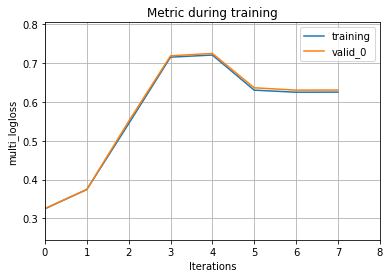

Accuracy:  0.9157077225989937


Iteration:  8
num_class:  3
num_tree_per_iteration:  8
max_feature_idx:  8
learning_rate:  0.8
num_leaves:  9
num_iterations:  9
max_bin:  9
Tree Size:  630


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.324673	valid_0's multi_logloss: 0.325265
[2]	training's multi_logloss: 0.37428	valid_0's multi_logloss: 0.374401
[3]	training's multi_logloss: 0.543796	valid_0's multi_logloss: 0.550007
[4]	training's multi_logloss: 0.715272	valid_0's multi_logloss: 0.71872
[5]	training's multi_logloss: 0.720666	valid_0's multi_logloss: 0.724857
[6]	training's multi_logloss: 0.630183	valid_0's multi_logloss: 0.63628
[7]	training's multi_logloss: 0.624882	valid_0's multi_logloss: 0.630287
[8]	training's multi_logloss: 0.625182	valid_0's multi_logloss: 0.63056
[9]	training's multi_logloss: 0.62528	valid_0's multi_logloss: 0.630649


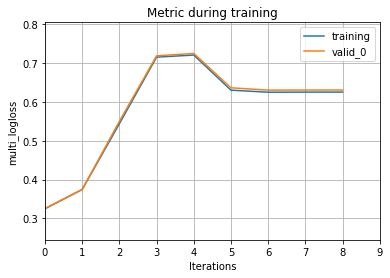

Accuracy:  0.9157077225989937


Iteration:  9
num_class:  3
num_tree_per_iteration:  9
max_feature_idx:  9
learning_rate:  0.9
num_leaves:  10
num_iterations:  1
max_bin:  10
Tree Size:  635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.334431	valid_0's multi_logloss: 0.33509


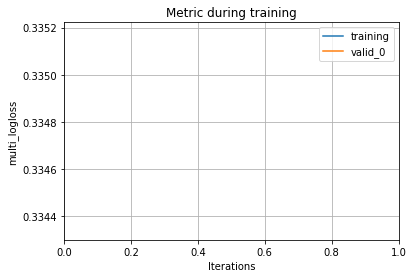

Accuracy:  0.9132119157004303


Iteration:  9
num_class:  3
num_tree_per_iteration:  9
max_feature_idx:  9
learning_rate:  0.9
num_leaves:  10
num_iterations:  2
max_bin:  10
Tree Size:  635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.334431	valid_0's multi_logloss: 0.33509
[2]	training's multi_logloss: 0.590752	valid_0's multi_logloss: 0.592089


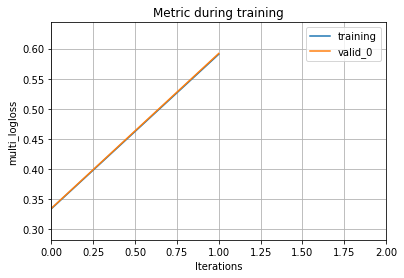

Accuracy:  0.9046324655436447


Iteration:  9
num_class:  3
num_tree_per_iteration:  9
max_feature_idx:  9
learning_rate:  0.9
num_leaves:  10
num_iterations:  3
max_bin:  10
Tree Size:  635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.334431	valid_0's multi_logloss: 0.33509
[2]	training's multi_logloss: 0.590752	valid_0's multi_logloss: 0.592089
[3]	training's multi_logloss: 0.584992	valid_0's multi_logloss: 0.592331


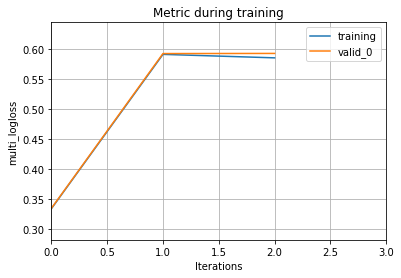

Accuracy:  0.9141890906439145


Iteration:  9
num_class:  3
num_tree_per_iteration:  9
max_feature_idx:  9
learning_rate:  0.9
num_leaves:  10
num_iterations:  4
max_bin:  10
Tree Size:  635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.334431	valid_0's multi_logloss: 0.33509
[2]	training's multi_logloss: 0.590752	valid_0's multi_logloss: 0.592089
[3]	training's multi_logloss: 0.584992	valid_0's multi_logloss: 0.592331
[4]	training's multi_logloss: 0.637117	valid_0's multi_logloss: 0.645538


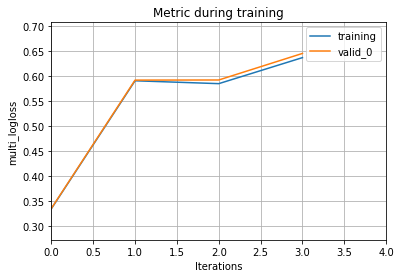

Accuracy:  0.9156165682199373


Iteration:  9
num_class:  3
num_tree_per_iteration:  9
max_feature_idx:  9
learning_rate:  0.9
num_leaves:  10
num_iterations:  5
max_bin:  10
Tree Size:  635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.334431	valid_0's multi_logloss: 0.33509
[2]	training's multi_logloss: 0.590752	valid_0's multi_logloss: 0.592089
[3]	training's multi_logloss: 0.584992	valid_0's multi_logloss: 0.592331
[4]	training's multi_logloss: 0.637117	valid_0's multi_logloss: 0.645538
[5]	training's multi_logloss: 0.667129	valid_0's multi_logloss: 0.674271


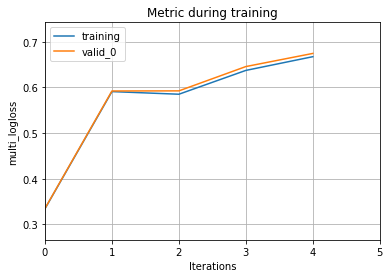

Accuracy:  0.9147907095456865


Iteration:  9
num_class:  3
num_tree_per_iteration:  9
max_feature_idx:  9
learning_rate:  0.9
num_leaves:  10
num_iterations:  6
max_bin:  10
Tree Size:  635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.334431	valid_0's multi_logloss: 0.33509
[2]	training's multi_logloss: 0.590752	valid_0's multi_logloss: 0.592089
[3]	training's multi_logloss: 0.584992	valid_0's multi_logloss: 0.592331
[4]	training's multi_logloss: 0.637117	valid_0's multi_logloss: 0.645538
[5]	training's multi_logloss: 0.667129	valid_0's multi_logloss: 0.674271
[6]	training's multi_logloss: 0.866159	valid_0's multi_logloss: 0.871665


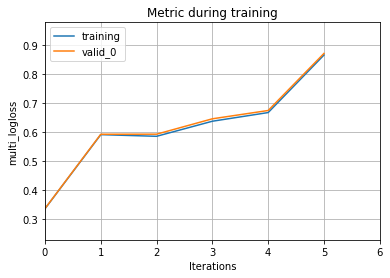

Accuracy:  0.9151735579377234


Iteration:  9
num_class:  3
num_tree_per_iteration:  9
max_feature_idx:  9
learning_rate:  0.9
num_leaves:  10
num_iterations:  7
max_bin:  10
Tree Size:  635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.334431	valid_0's multi_logloss: 0.33509
[2]	training's multi_logloss: 0.590752	valid_0's multi_logloss: 0.592089
[3]	training's multi_logloss: 0.584992	valid_0's multi_logloss: 0.592331
[4]	training's multi_logloss: 0.637117	valid_0's multi_logloss: 0.645538
[5]	training's multi_logloss: 0.667129	valid_0's multi_logloss: 0.674271
[6]	training's multi_logloss: 0.866159	valid_0's multi_logloss: 0.871665
[7]	training's multi_logloss: 0.87467	valid_0's multi_logloss: 0.880024


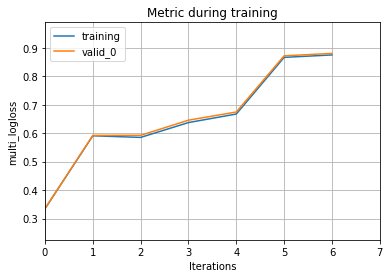

Accuracy:  0.9151735579377234


Iteration:  9
num_class:  3
num_tree_per_iteration:  9
max_feature_idx:  9
learning_rate:  0.9
num_leaves:  10
num_iterations:  8
max_bin:  10
Tree Size:  635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.334431	valid_0's multi_logloss: 0.33509
[2]	training's multi_logloss: 0.590752	valid_0's multi_logloss: 0.592089
[3]	training's multi_logloss: 0.584992	valid_0's multi_logloss: 0.592331
[4]	training's multi_logloss: 0.637117	valid_0's multi_logloss: 0.645538
[5]	training's multi_logloss: 0.667129	valid_0's multi_logloss: 0.674271
[6]	training's multi_logloss: 0.866159	valid_0's multi_logloss: 0.871665
[7]	training's multi_logloss: 0.87467	valid_0's multi_logloss: 0.880024
[8]	training's multi_logloss: 0.946075	valid_0's multi_logloss: 0.950474


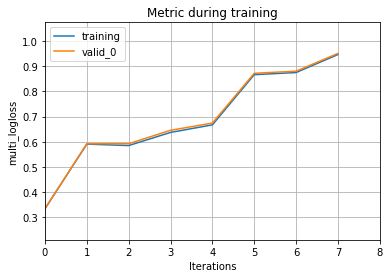

Accuracy:  0.9151735579377234


Iteration:  9
num_class:  3
num_tree_per_iteration:  9
max_feature_idx:  9
learning_rate:  0.9
num_leaves:  10
num_iterations:  9
max_bin:  10
Tree Size:  635


/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.334431	valid_0's multi_logloss: 0.33509
[2]	training's multi_logloss: 0.590752	valid_0's multi_logloss: 0.592089
[3]	training's multi_logloss: 0.584992	valid_0's multi_logloss: 0.592331
[4]	training's multi_logloss: 0.637117	valid_0's multi_logloss: 0.645538
[5]	training's multi_logloss: 0.667129	valid_0's multi_logloss: 0.674271
[6]	training's multi_logloss: 0.866159	valid_0's multi_logloss: 0.871665
[7]	training's multi_logloss: 0.87467	valid_0's multi_logloss: 0.880024
[8]	training's multi_logloss: 0.946075	valid_0's multi_logloss: 0.950474
[9]	training's multi_logloss: 0.942816	valid_0's multi_logloss: 0.94722


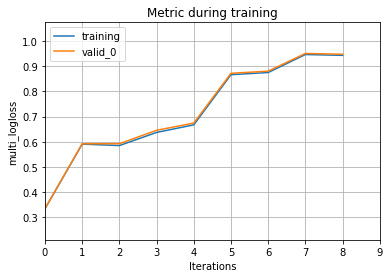

Accuracy:  0.9151735579377234


CPU times: user 13min, sys: 5.05 s, total: 13min 5s
Wall time: 9min 24s


In [16]:
%%time
max_accuracy = {}
acc = {}
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import lightgbm as lgb
for i in range(1,10):
  for j in range(1,10):
    print("Iteration: ",i)
    print("num_class: ",3)
    print("num_tree_per_iteration: ",i)
    print("max_feature_idx: ",i)
    print("learning_rate: ",(i/10))
    print("num_leaves: ",i+1)
    print("num_iterations: ",j)
    print("max_bin: ",i+1)
    print("Tree Size: ",(590+(i*5)))
    lgbm = lgb.LGBMClassifier(objective='binary:sigmoid', num_class = 3, num_tree_per_iteration= i, max_feature_idx=i,tree_size=(550+(i*5)),learning_rate=(i/10),num_leaves=i+1,num_iterations=j,max_bin=i+1)
    lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])
    lgb.plot_metric(lgbm)
    plt.show()
    y_pred = lgbm.predict(X_test)
    acc[j] = accuracy_score(y_test,y_pred)
    print("Accuracy: ",accuracy_score(y_test,y_pred))
    print("\n")
  Keymax = max(zip(acc.values(), acc.keys()))[1]
  max_accuracy[i]=acc[Keymax]

In [17]:
Keymax = max(zip(max_accuracy.values(), max_accuracy.keys()))[1]
print("Iteration giving Maximum Accuracy: ",Keymax)
print("Accuracy Score: ",max_accuracy[Keymax])

Iteration giving Maximum Accuracy:  7
Accuracy Score:  0.9166794282797346


## Hyperparamters that gave better accuracy
*   Iteration:  7
*   num_class:  3
*   num_tree_per_iteration:  7
*   max_feature_idx:  7
*   learning_rate:  0.7
*   num_leaves:  8
*   num_iterations:  7
*   max_bin:  8
*   Tree Size:  625



/usr/local/lib/python3.7/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	training's multi_logloss: 0.316329	valid_0's multi_logloss: 0.316845
[2]	training's multi_logloss: 0.307674	valid_0's multi_logloss: 0.307624
[3]	training's multi_logloss: 0.302874	valid_0's multi_logloss: 0.30284
[4]	training's multi_logloss: 0.302352	valid_0's multi_logloss: 0.302322
[5]	training's multi_logloss: 0.302259	valid_0's multi_logloss: 0.302234
[6]	training's multi_logloss: 0.302235	valid_0's multi_logloss: 0.302208
[7]	training's multi_logloss: 0.302226	valid_0's multi_logloss: 0.3022


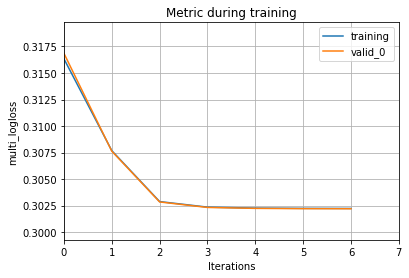

In [18]:
lgbm = lgb.LGBMClassifier(objective='binary', num_class = 3, num_tree_per_iteration= 7, max_feature_idx=7,tree_size=625,learning_rate=0.7,num_leaves=8,num_iterations=7,max_bin=8)
lgbm.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])
lgb.plot_metric(lgbm)
plt.show()

In [19]:
y_pred = lgbm.predict(X_test)
y_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [20]:
print(accuracy_score(y_test,y_pred))

0.9166794282797346


In [21]:
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.93      0.98      0.96    496209
       other       0.00      0.00      0.00      8342
    positive       0.63      0.34      0.44     43969

    accuracy                           0.92    548520
   macro avg       0.52      0.44      0.47    548520
weighted avg       0.89      0.92      0.90    548520



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [22]:
lgb.plot_tree(lgbm,figsize = (250,250),tree_index=0)

#**XGBoost**



##Hyperparameter Reference:
[https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/](https://)

[0]	validation_0-merror:0.083321	validation_1-merror:0.083369
[1]	validation_0-merror:0.083321	validation_1-merror:0.083369
[2]	validation_0-merror:0.083321	validation_1-merror:0.083369
[3]	validation_0-merror:0.083321	validation_1-merror:0.083369
[4]	validation_0-merror:0.083321	validation_1-merror:0.083369
[5]	validation_0-merror:0.083321	validation_1-merror:0.083369
[6]	validation_0-merror:0.083321	validation_1-merror:0.083369
[7]	validation_0-merror:0.083321	validation_1-merror:0.083369
[8]	validation_0-merror:0.083321	validation_1-merror:0.083369
[9]	validation_0-merror:0.083321	validation_1-merror:0.083369
[10]	validation_0-merror:0.083321	validation_1-merror:0.083369
[11]	validation_0-merror:0.083321	validation_1-merror:0.083369
[12]	validation_0-merror:0.083321	validation_1-merror:0.083369
[13]	validation_0-merror:0.083321	validation_1-merror:0.083369
[14]	validation_0-merror:0.083321	validation_1-merror:0.083369
[15]	validation_0-merror:0.083321	validation_1-merror:0.083369
[1

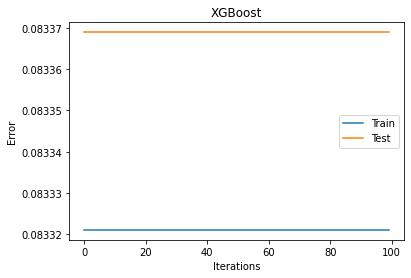

Accuracy:  0.9166794282797346
CPU times: user 4min 33s, sys: 741 ms, total: 4min 33s
Wall time: 4min 39s


In [23]:
%%time
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
xgbm = xgb.XGBClassifier(objective='binary:sigmoid', eta = 0.3,min_child_weight=1,max_depth=6,max_leaf_nodes=(2**6),gamma=0,max_delta_step=0,subsample=1,colsample_bytree=1,colsample_bylevel=1,alpha=0,scale_pos_weight=1,booster='gbtree')
xgbm.fit(X_train, y_train, eval_set=[(X_test, y_test), (X_train, y_train)])
results = xgbm.evals_result()
epochs = len(results['validation_0']['merror'])
x_axis = range(0, epochs)
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['merror'], label='Train')
ax.plot(x_axis, results['validation_1']['merror'], label='Test')
ax.legend()
plt.ylabel('Error')
plt.xlabel('Iterations')
plt.title('XGBoost')
plt.show()
y_pred = lgbm.predict(X_test)
print("Accuracy: ",accuracy_score(y_test,y_pred))

In [24]:
y_pred = xgbm.predict(X_test)
y_pred

array(['negative', 'negative', 'negative', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [25]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
print(accuracy_score(y_test,y_pred))

0.9166794282797346


In [26]:
print(classification_report(y_test,y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

    negative       0.93      0.98      0.96    496209
       other       0.00      0.00      0.00      8342
    positive       0.63      0.34      0.44     43969

    accuracy                           0.92    548520
   macro avg       0.52      0.44      0.47    548520
weighted avg       0.89      0.92      0.90    548520



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


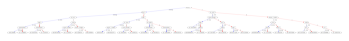

In [27]:
from xgboost import plot_tree
plot_tree(xgbm)
plt.rcParams["figure.figsize"] = (72000,72000)
#fig = plt.figure()
#fig.set_figheight(250)
#fig.set_figwidth(250)
plt.show()